In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

In [12]:
source_df = pd.read_excel('./resources/source_data/2022_inves.xlsx')
source_df.to_pickle('./resources/temp_file/2022_inves.pkl')

In [9]:
source_df = pd.read_pickle('./resources/temp_file/2022_inves.pkl').iloc[:, 11:]
source_df: pd.DataFrame
source_df

,1、请选择肝包虫类型：（）？,2、请选择肝包虫类型：（）？,3、请选择肝包虫类型：（）？,4、请选择肝包虫类型：（）？,5、请选择肝包虫类型：（）？,6、请选择肝包虫类型：（）？,7、请选择肝包虫类型：（）？,8、请选择肝包虫类型：（）？,9、请选择肝包虫类型：（）？,10、请选择肝包虫类型：（）？,...,441、请选择肝包虫类型：（）？,442、请选择肝包虫类型：（）？,443、请选择肝包虫类型：（）？,444、请选择肝包虫类型：（）？,445、请选择肝包虫类型：（）？,446、请选择肝包虫类型：（）？,447、请选择肝包虫类型：（）？,448、请选择肝包虫类型：（）？,449、请选择肝包虫类型：（）？,450、请选择肝包虫类型：（）？
0,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,1,-3,-3
1,-3,-3,-3,-3,-3,-3,1,-3,-3,-3,...,-3,-3,-3,1,-3,-3,-3,-3,-3,-3
2,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,1,-3,-3,-3,-3,-3,-3,-3
3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
4,-3,-3,-3,-3,-3,-3,-3,1,-3,-3,...,-3,-3,1,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,-3,-3,-3,-3,-3,-3,1,-3,-3,-3,...,1,-3,-3,-3,-3,-3,-3,-3,-3,-3
127,-3,-3,-3,-3,1,-3,-3,-3,-3,-3,...,-3,-3,2,-3,-3,-3,-3,-3,-3,-3
128,-3,-3,-3,-3,-3,1,-3,-3,-3,-3,...,-3,1,-3,-3,-3,-3,-3,-3,-3,-3
129,1,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3


In [10]:
# 制作选项答案
# 答案为A，索引为0；答案为B，索引为1
answer_list = []
answer_index = '001100100001110111100100111010'
for index in answer_index:
    if index == '0':
        answer_list += [0] * 15
    elif index == '1':
        answer_list += [1] * 15

In [11]:
# 查看每道题有多少人做
num_list = []
for i in range(450):
    num = np.sum(~(source_df.iloc[:, i] == -3))
    num_list.append(num)
num_list = np.array(num_list)

In [12]:
np.max(num_list), np.min(num_list), np.mean(num_list)

(18, 1, 8.733333333333333)

In [13]:
# 查看是否有题没有人做
np.sum(num_list == 0)

0

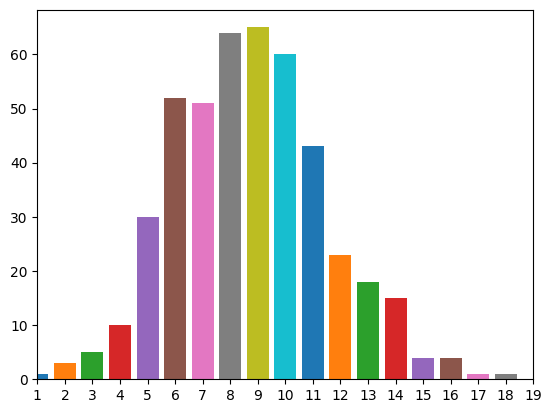

In [14]:
# 对应每一个人数，分别有多少道题被做
fig, ax = plt.subplots()
ax.set_xlim(1, 19)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
for i in range(1, 19):
    i_th_num = np.sum(num_list == i)
    ax.bar(i, i_th_num)

In [15]:
# 计算每道题的概率，即患者有多少可能预测该图是AE
# 设概率为预测 AE 的概率
predict_AE_prob_list = []
for i, num in enumerate(num_list):
    predict_AE_num = np.sum(source_df.iloc[:, i] == 2)
    predict_AE_prob = predict_AE_num / num
    predict_AE_prob_list.append(predict_AE_prob)

In [16]:
len(predict_AE_prob_list), predict_AE_prob_list[0], len(answer_list)

(450, 0.2857142857142857, 450)

In [17]:
roc_auc_score(answer_list, predict_AE_prob_list)

0.8933333333333333